# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda\envs\harryqi\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\envs\harryqi\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\Anaconda\envs\harryqi\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
# read data
train = pd.read_csv('train.csv')

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
# remove unrelated column and split data into X and Y
train = train.drop('Id', axis = 1)

In [4]:
# Found there is many nan values
train.isna().sum().sort_values(axis = 0, ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [5]:
# select the columns name that has more than around half
colnames = [i for i in train.isna().sum().sort_values(axis = 0, ascending = False).head(5).index]
train = train.drop(colnames, axis = 1)

<AxesSubplot:>

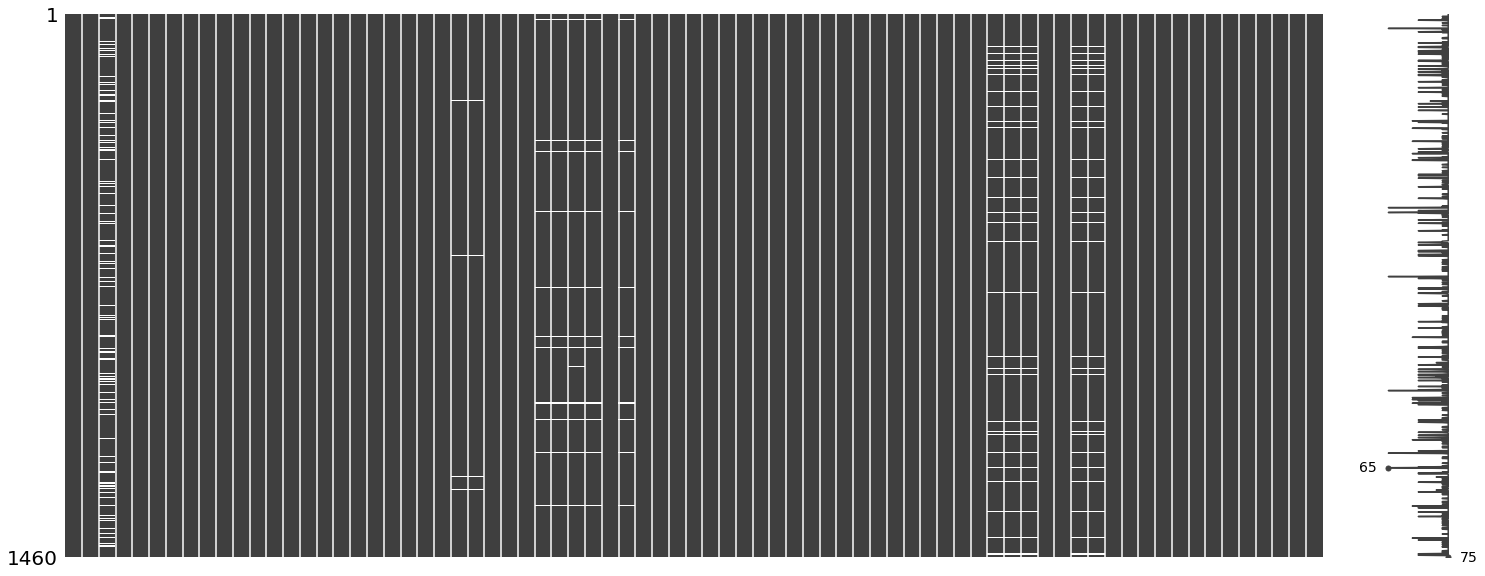

In [6]:
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

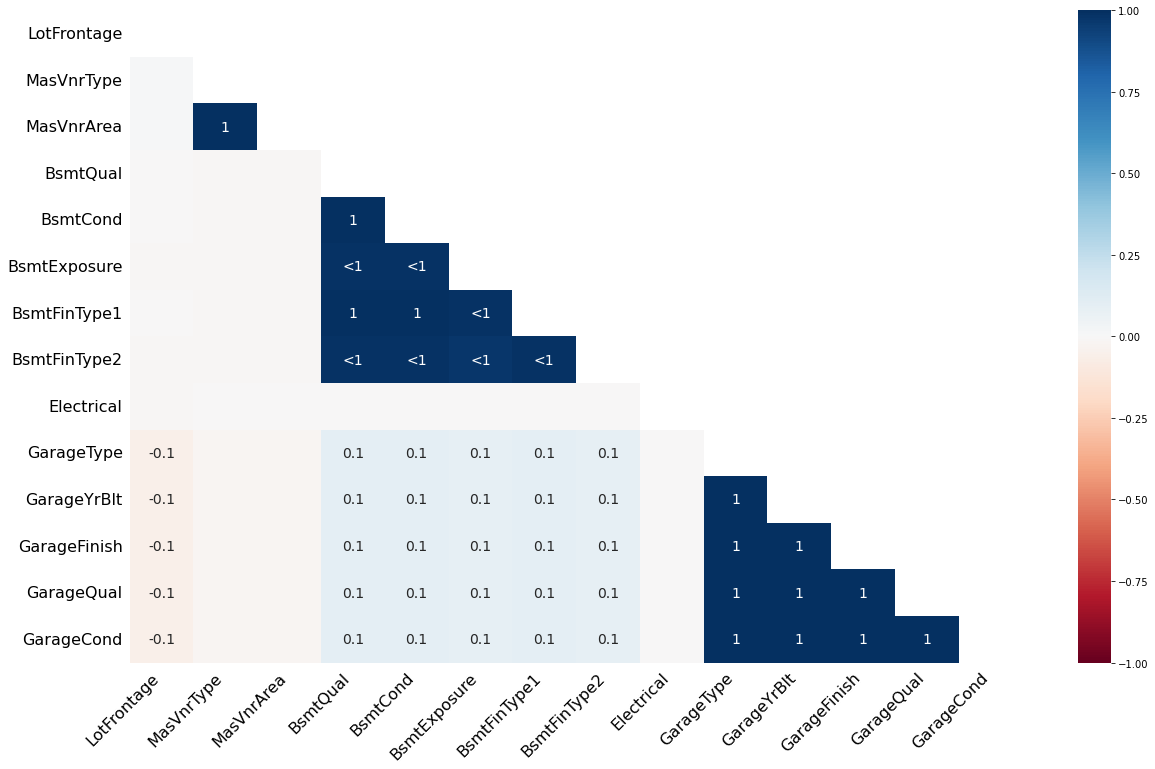

In [7]:
msno.heatmap(train)

<AxesSubplot:>

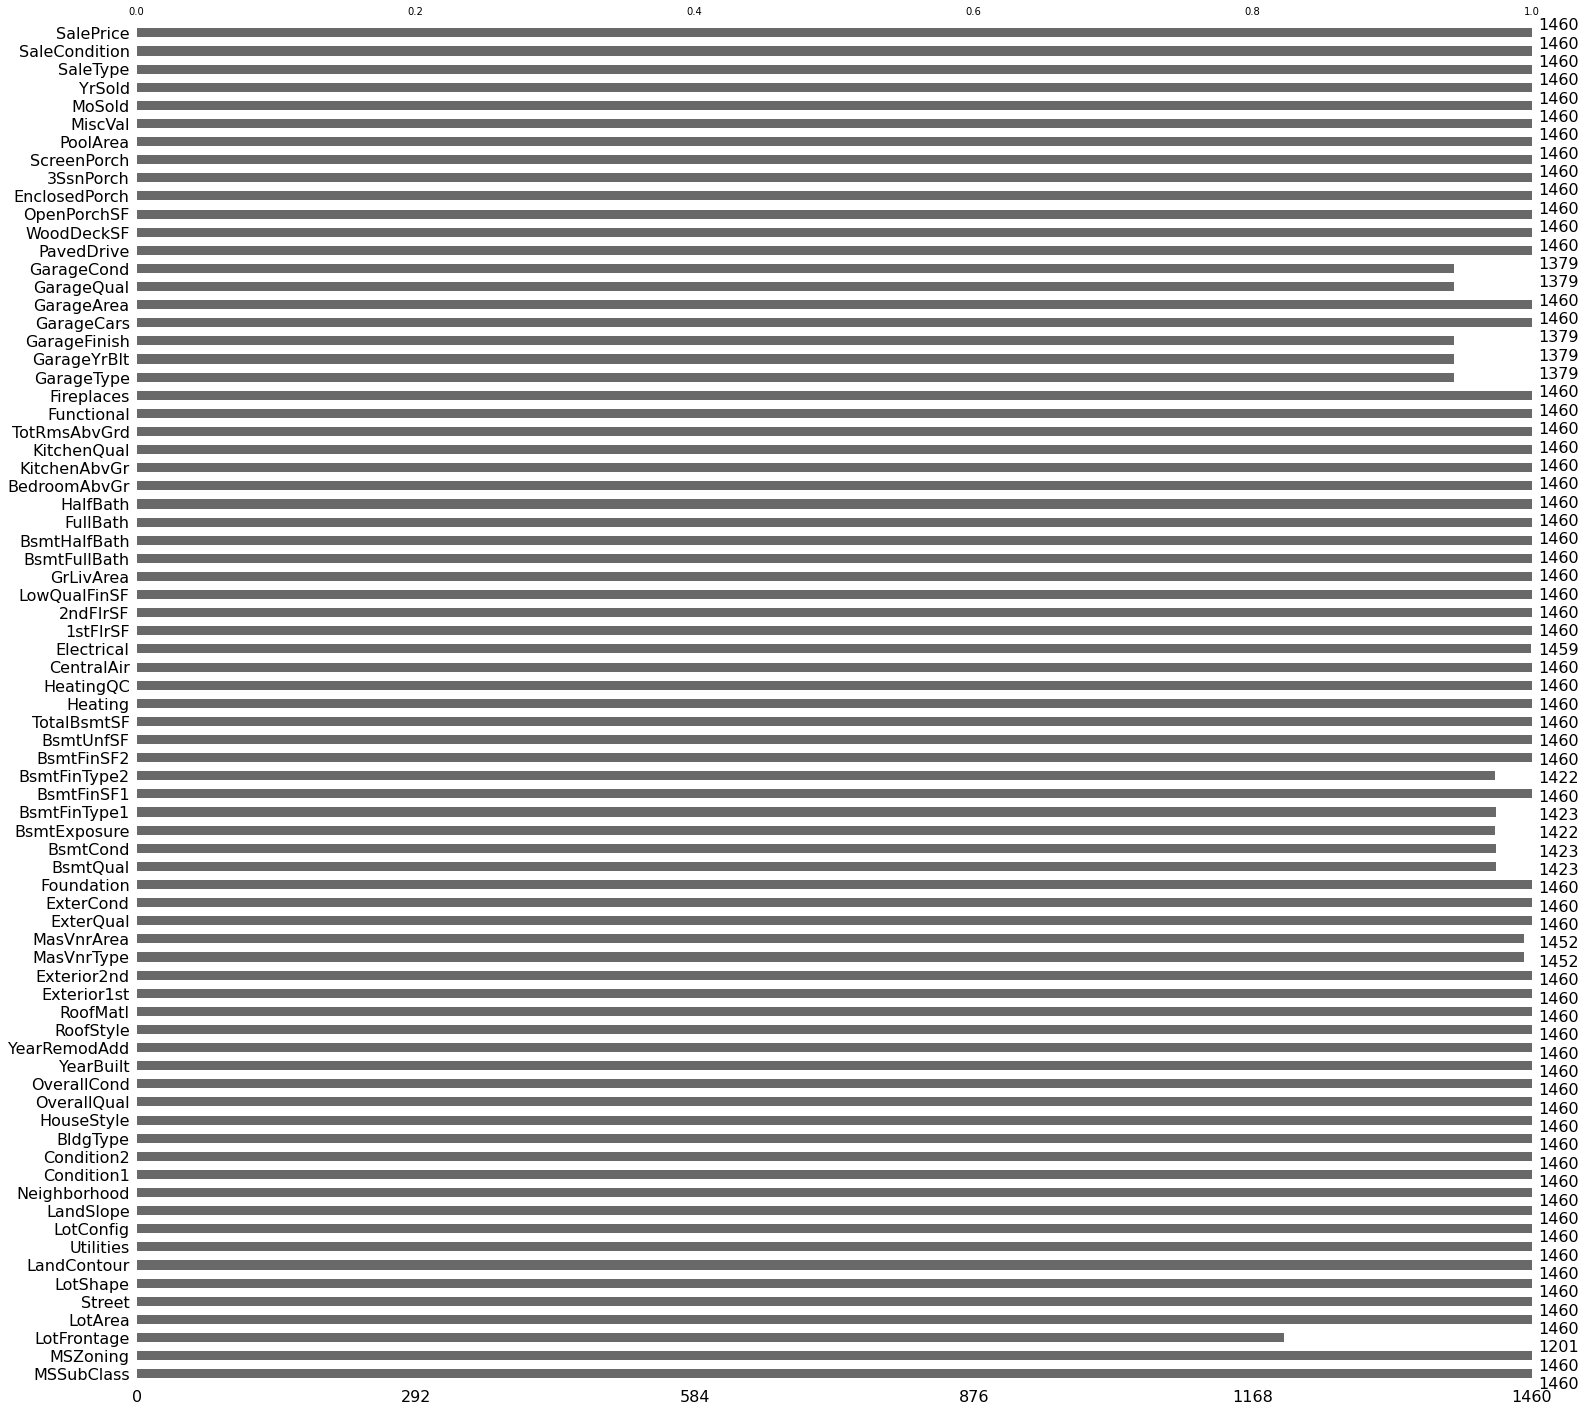

In [8]:
msno.bar(train)

In [10]:
train.isna().sum().sort_values(axis = 0, ascending = False).head(15)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
KitchenAbvGr      0
dtype: int64

In [12]:
# drop nan rows with more than 8 nan values in the column
train = train.dropna(axis = 0, subset = [i for i in train.isna().sum().sort_values(axis = 0, ascending = False).head(11).index])

In [13]:
# Where Nan values still left
train.isna().sum().sort_values(axis = 0, ascending = False).head(3)

MasVnrType    6
MasVnrArea    6
Electrical    1
dtype: int64

In [15]:
# replace the nan values in the categorical columns to the most frequent type
# replace the nan values in the numerical column to the median of this column
train['MasVnrType'] = train['MasVnrType'].fillna('U')
train['MasVnrArea'] = train['MasVnrArea'].replace(np.nan, train['MasVnrArea'].median())
train['Electrical'] = train['Electrical'].fillna('U')

In [26]:
X = train.drop('SalePrice', axis = 1) 
Y = train['SalePrice']

In [44]:
cols = X.columns
num_cols = X._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [46]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(X[cat_cols])
X_encoded = X.drop(cat_cols, axis=1)
X_encoded = X_encoded.join(one_hot)
X_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Condition2_PosN,Condition2_RRNn,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,1,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,1,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,1,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,0,1,1,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,1,0,0,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,1,0,0,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,0,1,1,0,0,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,0,1,1,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [120]:
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# scaler1= ss.fit(X_train)
# scaler2 = ss.fit(X_test)
# scaler1 = scaler1.transform(X_train)
# scaler1 = scaler1.transform(X_train)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))

MSE:  2223427474.090856
RMSE:  47153.23397277069
MAE:  22810.928817205204


In [123]:
y_train.mean()

186799.71641791044

In [125]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Condition2_PosN,Condition2_RRNn,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW
414,60,59.0,11228,7,5,1993,1993,0.0,50,531,...,0,0,0,0,1,0,1,0,0,0
998,30,60.0,9786,3,4,1922,1950,0.0,0,0,...,0,0,0,0,0,1,1,0,0,0
141,20,78.0,11645,7,5,2005,2005,0.0,1300,0,...,0,0,0,0,1,0,1,0,0,0
130,60,88.0,14200,7,6,1966,1966,309.0,445,0,...,0,0,0,0,0,1,1,0,0,0
498,20,65.0,7800,5,7,1967,2004,89.0,450,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,20,61.0,7943,4,5,1961,1961,192.0,903,0,...,0,0,0,0,0,1,1,0,0,0
171,20,141.0,31770,6,5,1960,1960,112.0,639,0,...,0,0,0,0,0,1,1,0,0,0
1388,20,42.0,14892,9,5,2006,2007,160.0,1320,0,...,0,0,1,0,0,0,1,0,0,0
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0,0,0,0,1,0,1,0,0,0


In [133]:
X_train.iloc[9,:].head(20)

MSSubClass        50.0
LotFrontage       50.0
LotArea         8635.0
OverallQual        5.0
OverallCond        5.0
YearBuilt       1948.0
YearRemodAdd    2001.0
MasVnrArea         0.0
BsmtFinSF1       336.0
BsmtFinSF2        41.0
BsmtUnfSF        295.0
TotalBsmtSF      672.0
1stFlrSF        1072.0
2ndFlrSF         213.0
LowQualFinSF       0.0
GrLivArea       1285.0
BsmtFullBath       1.0
BsmtHalfBath       0.0
FullBath           1.0
HalfBath           0.0
Name: 77, dtype: float64

In [132]:
X_train.iloc[8,:].head(20)

MSSubClass        20.0
LotFrontage       65.0
LotArea         8125.0
OverallQual        6.0
OverallCond        5.0
YearBuilt       1994.0
YearRemodAdd    1998.0
MasVnrArea       258.0
BsmtFinSF1      1138.0
BsmtFinSF2         0.0
BsmtUnfSF        270.0
TotalBsmtSF     1408.0
1stFlrSF        1679.0
2ndFlrSF           0.0
LowQualFinSF       0.0
GrLivArea       1679.0
BsmtFullBath       1.0
BsmtHalfBath       0.0
FullBath           2.0
HalfBath           0.0
Name: 667, dtype: float64

In [131]:
print(y_train[9],y_train[8])

118000 129900
